#  **INTRODUCTION:-**

##Welcome!

### This Project is all about flowers, specifically Iris flowers.
###The data source file is IRIS.csv dataset that conatins 5 columns(speal_length,sepal_width,petal_length,petal_width,species).

###The aim is to classify iris flowers among three species (sentosa,versicolor and virginica) from measurements of sepals and petals lenght and width






In [38]:
# Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
#Step 2: Loading data
df=pd.read_csv('IRIS.csv')

In [4]:
# Step 3: Explore the dataset
print("First 5 rows of the dataset:")
print(df)

First 5 rows of the dataset:
     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [5]:
# Step 4: Data Understanding

df.dtypes   #returns column datatypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.shape    #returns no. of rows & columns

(150, 5)

In [7]:

df.info()   #returns data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:

df.describe()    #returns statistical information

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
  #Count of Each Species
  print(df['species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [10]:
#Step 5: Data Cleaning

df.isnull().sum()   #returns no. of null values



sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:

df.dropna()  #removes null values and return table

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# **Visualization of Dataset**

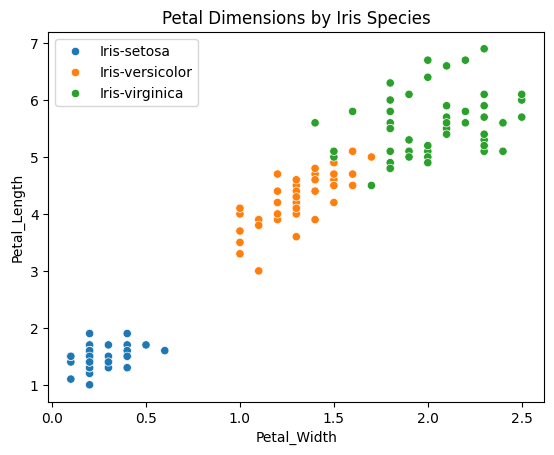



In colorful stacked scatter chart,we compared the petal lengths and petal width of different Iris Flower species. Each color represents a species and each point shows how long petals are on average. This chat helps us understanding and comapre petal lenght and petal width across different Iris Species.





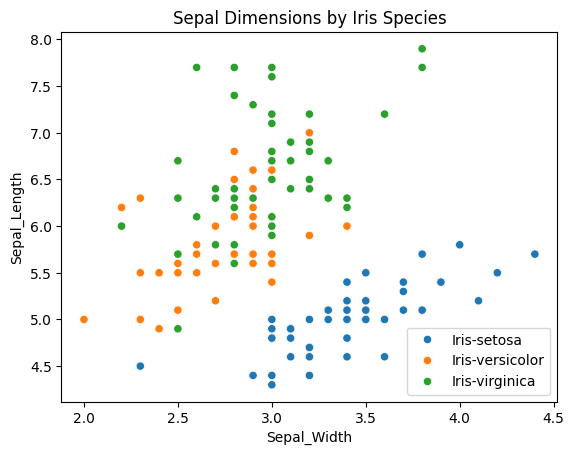



In colorful stacked scatter chart,we compared the sepal lengths and sepal width of different Iris Flower species. Each color represents a species and each point shows how long sepals are on average. This chat helps us understanding and comapre sepal lenght and sepal width across different Iris Species.


In [12]:
#Step 6: Visualization using graph


# Grouped bar chart for petal length and petal width by species
sns.scatterplot(x='petal_width', y='petal_length', data=df, hue='species')
plt.title('Petal Dimensions by Iris Species')
plt.xlabel('Petal_Width')
plt.ylabel('Petal_Length')
plt.legend()
plt.show()


print("\n\nIn colorful stacked scatter chart,we compared the petal lengths and petal width of different Iris Flower species. Each color represents a species and each point shows how long petals are on average. This chat helps us understanding and comapre petal lenght and petal width across different Iris Species.")
print("\n\n")

# Grouped bar chart for sepal length and sepal width by species
sns.scatterplot(x='sepal_width', y='sepal_length', data=df, color='skyblue', hue='species')
plt.title('Sepal Dimensions by Iris Species')
plt.xlabel('Sepal_Width')
plt.ylabel('Sepal_Length')
plt.legend()
plt.show()

print("\n\nIn colorful stacked scatter chart,we compared the sepal lengths and sepal width of different Iris Flower species. Each color represents a species and each point shows how long sepals are on average. This chat helps us understanding and comapre sepal lenght and sepal width across different Iris Species.")

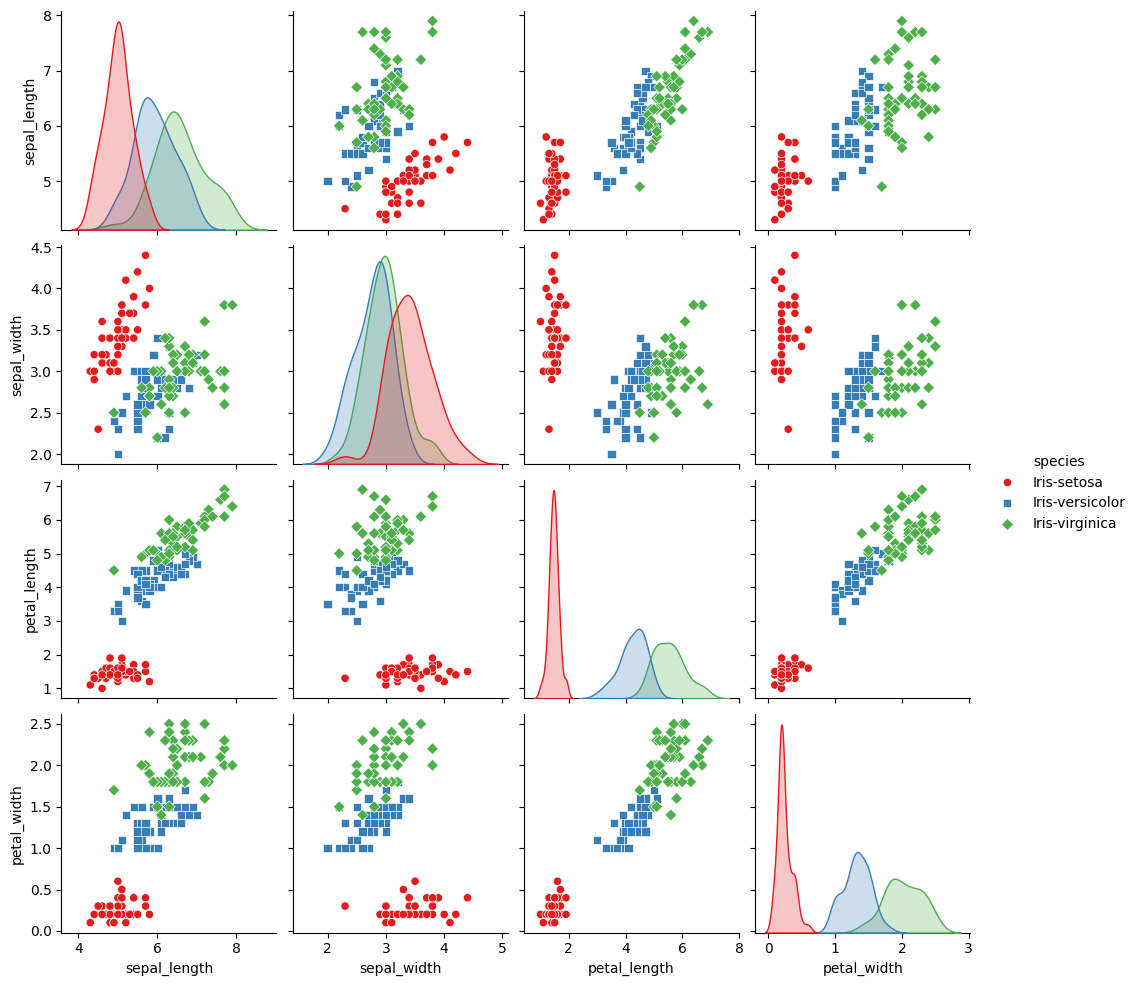

In [13]:
#Scatter Plot Relationships Among all features
sns.pairplot(df, hue='species',markers=['o', 's', 'D'], palette='Set1')
plt.show()

It's a visual representation that shows us all the relationships between different features of Iris flowers. Each dot on the plot is like a unique Iris flower, and the plots help us see how these flowers are similar or different.

In simple terms, if we have features like petal length, petal width, sepal length, and sepal width, the pair plot will draw scatter plots for every pair of features. It also shows histograms along the diagonal, giving us a glimpse of how each feature behaves on its own.

# **Machine Learning Algorithm Used is SVM(Support Vector Machine)**

In [14]:
#Step 7: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['species'],test_size=0.25, random_state=42)

In [15]:
print(x_test)

     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
31            5.4          3.4           1.5          0.4
64            5.6          2.9           3.6          1.3
141           6.9          3.1           5.1          2.3
68            6.2          2.2           4.5          1.5
82            5.8          2.7           3.9          1.2
110           6.5          3.2           5.1          2.0
12            4.8          3.0           1.4          0.1
36            5.5          3.5           1.3          0.2
9             4.9          3.1           1.5          0.1
19            5.1          3.8           1.5          0.3
56            6.3          3.3           4.7          1.6
104           

In [16]:
print(y_test)

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
146     Iris-virginica
51     Iris-versicolor
27         Iris-setosa
Name: species, dtype: object


In [17]:
print(x_train)

     sepal_length  sepal_width  petal_length  petal_width
4             5.0          3.6           1.4          0.2
32            5.2          4.1           1.5          0.1
142           5.8          2.7           5.1          1.9
85            6.0          3.4           4.5          1.6
86            6.7          3.1           4.7          1.5
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[112 rows x 4 columns]


In [18]:
print(y_train)

4          Iris-setosa
32         Iris-setosa
142     Iris-virginica
85     Iris-versicolor
86     Iris-versicolor
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: species, Length: 112, dtype: object


In [19]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
# Step 8: Performing Suppot Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [21]:
# Step 9: Make predictions on the test se
y_pred = svm_classifier.predict(x_test)

print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa']


In [34]:
# Step 10: Print Results
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 97.37 %
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



# **ACCURACY PREDICTED = 97.37%**

In [40]:
#Step 11: Testing Model

#creation of confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#accuracy of confusion matrix created
accuracies = cross_val_score(estimator = svm_classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy of Working Model : {:.2f} %".format(accuracies.mean()*100))



[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
Accuracy of Working Model : 95.53 %


# **ACCURACY OF CONFUSION MATRIX = 95.37%**

Our model achieved an outstanding accuracy of **97.37%**, showcasing its robust performance. The confusion matrix reveals remarkable precision, with only one misclassified data point. This signifies the model's exceptional ability to make accurate predictions, emphasizing its reliability and effectiveness.

# **It is observed that Accuracy of Prediction is nearly same as Accuracy of Confusion Matrix**

# **i.e 97.37% and 95.37%**


# **Conclusion:-**

###Here, Machine Learning Algorithm used is Support Vector Machine (SVM) to figure out which type of Iris flower is which. The program did a really good job. This means it's pretty accurate.

###So, SVM, is quite good at telling different types of Iris flowers apart based on their features